#### Review
#### Linear regression on birth/life data
#### Control Flow
#### tf.data
#### Optimizers, gradients
#### Logistic regression on MNIST
#### Loss functions


## Computation graph

- TensorFlow separates definition of computations from their execution

- Phase 1: assemble a graph

- Phase 2: use a session to execute operations in the graph.


#### tf.constant and tf.Variable

- Constant values are stored in the graph definition
- Sessions allocate memory to store variable values


#### tf.placeholder and feed_dict

- Feed values into placeholders with a dictionary (feed_dict)
- Easy to use but poor performance


#### Avoid lazy loading

- Separate the assembling of graph and executing ops
- Use Python attribute to ensure a function is only loaded the first time it’s called


## Linear Regression in Tensorflow

#### Model the linear relationship between:
#### dependent variable Y
#### explanatory variables X


### World Development Indicators dataset

X: birth rate
Y: life expectancy
190 countries


- Find a linear relationship between X and Y to predict Y from X


#### Model

- Inference: Y_predicted = w * X + b
- Mean squared error: E[(y - y_predicted)2]

In [28]:
""" Starter code for simple linear regression example using placeholders
Created by Chip Huyen (huyenn@cs.stanford.edu)
CS20: "TensorFlow for Deep Learning Research"
cs20.stanford.edu
Lecture 03
"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import time

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import utils

tf.reset_default_graph()
DATA_FILE = 'stanford-tensorflow-tutorials-master/examples/data/birth_life_2010.txt'

# Step 1: read in data from the .txt file
data, n_samples = utils.read_birth_life_data(DATA_FILE)

# Step 2: create placeholders for X (birth rate) and Y (life expectancy)
# Remember both X and Y are scalars with type float
X =  tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
#############################
########## TO DO ############
#############################

# Step 3: create weight and bias, initialized to 0.0
# Make sure to use tf.get_variable
w, b =  tf.get_variable("weight", initializer=tf.constant(0.0)) , tf.get_variable("bias", initializer=tf.constant(0.0))
#############################
########## TO DO ############
#############################

# Step 4: build model to predict Y
# e.g. how would you derive at Y_predicted given X, w, and b
Y_predicted = w * X + b
#############################
########## TO DO ############
#############################

# Step 5: use the square error as the loss function
#loss = (Y_predicted - Y)**2
loss = huber_loss(Y, Y_predicted)
#############################
########## TO DO ############
#############################

# Step 6: using gradient descent with learning rate of 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

start = time.time()

# Create a filewriter to write the model's graph to TensorBoard

writer = tf.summary.FileWriter('./graphs/lin_reg', tf.get_default_graph())
#############################
########## TO DO ############
#############################

with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    
    sess.run(tf.variables_initializer([w, b]))
    #############################
    ########## TO DO ############
    #############################

    # Step 8: train the model for 100 epochs
    for i in range(100):
        total_loss = 0
        for x, y in data:
            print(x,y)
            # Execute train_op and get the value of loss.
            # Don't forget to feed in data for placeholders
            _, loss_ = sess.run([optimizer, loss], feed_dict = {X:x, Y:y})
            #print(acc,loss_)
            total_loss += loss_

        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

    # close the writer when you're done using it
    #############################
    ########## TO DO ############
    #############################
    writer.close()
    
    # Step 9: output the values of w and b
    w_out, b_out = w.eval(), b.eval()
    #############################
    ########## TO DO ############
    #############################

print('Took: %f seconds' %(time.time() - start))



1.822 74.82825
3.869 70.81949
3.911 72.15066
5.578 61.999855
1.579 73.92766
4.229 67.465195
1.15 81.641464
3.86 72.30639
3.142 68.484314
3.951 62.44061
2.16 80.70244
2.141 76.30168
2.002 64.662094
2.504 68.19498
3.451 68.76483
2.635 74.02456
1.092 80.775314
2.747 67.064
1.22 80.76195
1.39 82.932686
2.117 68.889656
1.108 82.87805
2.47 75.99427
2.09 75.07688
2.668 69.22583
2.022 68.53214
1.598 73.273094
2.581 62.53622
2.042 77.93202
1.92 81.69512
2.499 68.001
1.94 80.402435
1.445 70.27561
2.399 64.86351
2.088 73.696655
3.297 67.2599
1.5 82.24634
1.98 81.45122
1.39 81.62683
1.57 79.42195
1.4 75.1122
1.4 73.936584
1.54 68.80488
1.38 73.458534
1.32 79.02683
1.38 76.24634
1.95 80.99756
1.79 80.70244
1.656 74.3111
1.475 68.90371
1.422 74.61885
1.63 80.08781
1.55 73.268295
1.17 73.482925
2.898 69.36846
2.2893 69.88439
2.59 68.295364
1.4 81.73659
2.07 80.291954
2.2 81.45122
1.25 74.20731
1.44 80.3878
1.39 79.98781
1.555 73.32734
2.0 81.36829
1.87 79.870735
1.63 75.42927
1.87 79.1
1.49 77.42439


3.869 70.81949
3.911 72.15066
5.578 61.999855
1.579 73.92766
4.229 67.465195
1.15 81.641464
3.86 72.30639
3.142 68.484314
3.951 62.44061
2.16 80.70244
2.141 76.30168
2.002 64.662094
2.504 68.19498
3.451 68.76483
2.635 74.02456
1.092 80.775314
2.747 67.064
1.22 80.76195
1.39 82.932686
2.117 68.889656
1.108 82.87805
2.47 75.99427
2.09 75.07688
2.668 69.22583
2.022 68.53214
1.598 73.273094
2.581 62.53622
2.042 77.93202
1.92 81.69512
2.499 68.001
1.94 80.402435
1.445 70.27561
2.399 64.86351
2.088 73.696655
3.297 67.2599
1.5 82.24634
1.98 81.45122
1.39 81.62683
1.57 79.42195
1.4 75.1122
1.4 73.936584
1.54 68.80488
1.38 73.458534
1.32 79.02683
1.38 76.24634
1.95 80.99756
1.79 80.70244
1.656 74.3111
1.475 68.90371
1.422 74.61885
1.63 80.08781
1.55 73.268295
1.17 73.482925
2.898 69.36846
2.2893 69.88439
2.59 68.295364
1.4 81.73659
2.07 80.291954
2.2 81.45122
1.25 74.20731
1.44 80.3878
1.39 79.98781
1.555 73.32734
2.0 81.36829
1.87 79.870735
1.63 75.42927
1.87 79.1
1.49 77.42439
1.476 79.380394

1.555 73.32734
2.0 81.36829
1.87 79.870735
1.63 75.42927
1.87 79.1
1.49 77.42439
1.476 79.380394
1.46 76.47561
1.46 79.832
1.49 73.51219
1.148 75.40044
1.84 79.936584
1.44 70.40488
2.3 70.506516
1.44 80.38293
1.736 73.78356
1.536 76.90095
1.8 79.18944
2.49 74.12732
1.9856 76.23683
1.639 69.755
1.896 75.22212
2.336 70.33532
2.064 72.11253
1.98 74.4399
1.797 78.91329
2.501 73.76498
2.954 72.277
2.484 75.97424
2.622 73.72922
2.32 76.68378
2.329 72.84712
3.139 72.82593
3.34 61.763
2.262 69.54915
3.983 70.82542
2.235 75.66044
2.25 71.73237
2.479 75.462296
2.58 73.20003
1.467 78.96415
1.848 79.19261
2.1 73.42968
1.862 78.885735
1.83 73.09953
3.348 66.26856
2.79 75.83995
1.551 76.57283
1.699 74.975174
2.211 75.63215
5.2 65.030464
4.453 72.643684
1.749 76.57361
2.04 74.6
2.934 75.70256
2.811 73.85042
2.271 78.09759
2.309 73.12461
2.279 71.86463
1.38 80.948784
2.564 74.75312
1.8 72.40875
2.295 74.60473
3.8 73.28966
3.03 81.504875
4.702 68.486046
1.67 72.751854
2.733 72.975266
3.75 57.52739
2.54

2.811 73.85042
2.271 78.09759
2.309 73.12461
2.279 71.86463
1.38 80.948784
2.564 74.75312
1.8 72.40875
2.295 74.60473
3.8 73.28966
3.03 81.504875
4.702 68.486046
1.67 72.751854
2.733 72.975266
3.75 57.52739
2.54 75.02383
2.264 72.85254
2.1 78.24146
1.677 80.797806
1.764 79.288536
2.313 74.72261
3.423 65.19885
2.727 68.39483
1.752 76.551414
2.625 65.13134
2.399 66.90885
2.245 68.6348
6.288 48.282196
3.29 49.860878
6.258 48.455486
6.149 53.614635
4.072 56.588707
4.896 58.160023
5.544 57.38749
3.364 48.342804
4.4 61.108242
2.458 52.08149
6.339 50.89554
4.982 47.402195
2.5 73.03415
4.819 58.954075
5.371 55.05712
5.525 51.410023
7.063 54.265633
3.217 62.0701
4.912 49.696926
1.47 72.967316
4.533 58.21695
6.294 50.95483
5.99 53.462635
4.651 66.46707
5.238 56.147587
3.199 47.365074
4.718 56.497074
5.063 47.700657
5.246 53.638584
4.17 63.83727
3.25 62.286682
4.193 58.7151
4.453 60.994194
5.185 50.840805
5.775 48.069584
4.544 56.960194
4.919 60.626266
5.981 49.194828
4.631 47.61846
2.405 73.7740

4.718 56.497074
5.063 47.700657
5.246 53.638584
4.17 63.83727
3.25 62.286682
4.193 58.7151
4.453 60.994194
5.185 50.840805
5.775 48.069584
4.544 56.960194
4.919 60.626266
5.981 49.194828
4.631 47.61846
2.405 73.77405
4.487 51.062756
4.338 49.87722
5.85 54.924194
2.75 53.109512
5.287 55.585587
5.443 50.65366
Epoch 12: 304.4644903231608
1.822 74.82825
3.869 70.81949
3.911 72.15066
5.578 61.999855
1.579 73.92766
4.229 67.465195
1.15 81.641464
3.86 72.30639
3.142 68.484314
3.951 62.44061
2.16 80.70244
2.141 76.30168
2.002 64.662094
2.504 68.19498
3.451 68.76483
2.635 74.02456
1.092 80.775314
2.747 67.064
1.22 80.76195
1.39 82.932686
2.117 68.889656
1.108 82.87805
2.47 75.99427
2.09 75.07688
2.668 69.22583
2.022 68.53214
1.598 73.273094
2.581 62.53622
2.042 77.93202
1.92 81.69512
2.499 68.001
1.94 80.402435
1.445 70.27561
2.399 64.86351
2.088 73.696655
3.297 67.2599
1.5 82.24634
1.98 81.45122
1.39 81.62683
1.57 79.42195
1.4 75.1122
1.4 73.936584
1.54 68.80488
1.38 73.458534
1.32 79.02683
1.

1.656 74.3111
1.475 68.90371
1.422 74.61885
1.63 80.08781
1.55 73.268295
1.17 73.482925
2.898 69.36846
2.2893 69.88439
2.59 68.295364
1.4 81.73659
2.07 80.291954
2.2 81.45122
1.25 74.20731
1.44 80.3878
1.39 79.98781
1.555 73.32734
2.0 81.36829
1.87 79.870735
1.63 75.42927
1.87 79.1
1.49 77.42439
1.476 79.380394
1.46 76.47561
1.46 79.832
1.49 73.51219
1.148 75.40044
1.84 79.936584
1.44 70.40488
2.3 70.506516
1.44 80.38293
1.736 73.78356
1.536 76.90095
1.8 79.18944
2.49 74.12732
1.9856 76.23683
1.639 69.755
1.896 75.22212
2.336 70.33532
2.064 72.11253
1.98 74.4399
1.797 78.91329
2.501 73.76498
2.954 72.277
2.484 75.97424
2.622 73.72922
2.32 76.68378
2.329 72.84712
3.139 72.82593
3.34 61.763
2.262 69.54915
3.983 70.82542
2.235 75.66044
2.25 71.73237
2.479 75.462296
2.58 73.20003
1.467 78.96415
1.848 79.19261
2.1 73.42968
1.862 78.885735
1.83 73.09953
3.348 66.26856
2.79 75.83995
1.551 76.57283
1.699 74.975174
2.211 75.63215
5.2 65.030464
4.453 72.643684
1.749 76.57361
2.04 74.6
2.934 75.7

1.699 74.975174
2.211 75.63215
5.2 65.030464
4.453 72.643684
1.749 76.57361
2.04 74.6
2.934 75.70256
2.811 73.85042
2.271 78.09759
2.309 73.12461
2.279 71.86463
1.38 80.948784
2.564 74.75312
1.8 72.40875
2.295 74.60473
3.8 73.28966
3.03 81.504875
4.702 68.486046
1.67 72.751854
2.733 72.975266
3.75 57.52739
2.54 75.02383
2.264 72.85254
2.1 78.24146
1.677 80.797806
1.764 79.288536
2.313 74.72261
3.423 65.19885
2.727 68.39483
1.752 76.551414
2.625 65.13134
2.399 66.90885
2.245 68.6348
6.288 48.282196
3.29 49.860878
6.258 48.455486
6.149 53.614635
4.072 56.588707
4.896 58.160023
5.544 57.38749
3.364 48.342804
4.4 61.108242
2.458 52.08149
6.339 50.89554
4.982 47.402195
2.5 73.03415
4.819 58.954075
5.371 55.05712
5.525 51.410023
7.063 54.265633
3.217 62.0701
4.912 49.696926
1.47 72.967316
4.533 58.21695
6.294 50.95483
5.99 53.462635
4.651 66.46707
5.238 56.147587
3.199 47.365074
4.718 56.497074
5.063 47.700657
5.246 53.638584
4.17 63.83727
3.25 62.286682
4.193 58.7151
4.453 60.994194
5.185 5

3.25 62.286682
4.193 58.7151
4.453 60.994194
5.185 50.840805
5.775 48.069584
4.544 56.960194
4.919 60.626266
5.981 49.194828
4.631 47.61846
2.405 73.77405
4.487 51.062756
4.338 49.87722
5.85 54.924194
2.75 53.109512
5.287 55.585587
5.443 50.65366
Epoch 22: 251.93409620844758
1.822 74.82825
3.869 70.81949
3.911 72.15066
5.578 61.999855
1.579 73.92766
4.229 67.465195
1.15 81.641464
3.86 72.30639
3.142 68.484314
3.951 62.44061
2.16 80.70244
2.141 76.30168
2.002 64.662094
2.504 68.19498
3.451 68.76483
2.635 74.02456
1.092 80.775314
2.747 67.064
1.22 80.76195
1.39 82.932686
2.117 68.889656
1.108 82.87805
2.47 75.99427
2.09 75.07688
2.668 69.22583
2.022 68.53214
1.598 73.273094
2.581 62.53622
2.042 77.93202
1.92 81.69512
2.499 68.001
1.94 80.402435
1.445 70.27561
2.399 64.86351
2.088 73.696655
3.297 67.2599
1.5 82.24634
1.98 81.45122
1.39 81.62683
1.57 79.42195
1.4 75.1122
1.4 73.936584
1.54 68.80488
1.38 73.458534
1.32 79.02683
1.38 76.24634
1.95 80.99756
1.79 80.70244
1.656 74.3111
1.475 6

1.38 76.24634
1.95 80.99756
1.79 80.70244
1.656 74.3111
1.475 68.90371
1.422 74.61885
1.63 80.08781
1.55 73.268295
1.17 73.482925
2.898 69.36846
2.2893 69.88439
2.59 68.295364
1.4 81.73659
2.07 80.291954
2.2 81.45122
1.25 74.20731
1.44 80.3878
1.39 79.98781
1.555 73.32734
2.0 81.36829
1.87 79.870735
1.63 75.42927
1.87 79.1
1.49 77.42439
1.476 79.380394
1.46 76.47561
1.46 79.832
1.49 73.51219
1.148 75.40044
1.84 79.936584
1.44 70.40488
2.3 70.506516
1.44 80.38293
1.736 73.78356
1.536 76.90095
1.8 79.18944
2.49 74.12732
1.9856 76.23683
1.639 69.755
1.896 75.22212
2.336 70.33532
2.064 72.11253
1.98 74.4399
1.797 78.91329
2.501 73.76498
2.954 72.277
2.484 75.97424
2.622 73.72922
2.32 76.68378
2.329 72.84712
3.139 72.82593
3.34 61.763
2.262 69.54915
3.983 70.82542
2.235 75.66044
2.25 71.73237
2.479 75.462296
2.58 73.20003
1.467 78.96415
1.848 79.19261
2.1 73.42968
1.862 78.885735
1.83 73.09953
3.348 66.26856
2.79 75.83995
1.551 76.57283
1.699 74.975174
2.211 75.63215
5.2 65.030464
4.453 72.

1.467 78.96415
1.848 79.19261
2.1 73.42968
1.862 78.885735
1.83 73.09953
3.348 66.26856
2.79 75.83995
1.551 76.57283
1.699 74.975174
2.211 75.63215
5.2 65.030464
4.453 72.643684
1.749 76.57361
2.04 74.6
2.934 75.70256
2.811 73.85042
2.271 78.09759
2.309 73.12461
2.279 71.86463
1.38 80.948784
2.564 74.75312
1.8 72.40875
2.295 74.60473
3.8 73.28966
3.03 81.504875
4.702 68.486046
1.67 72.751854
2.733 72.975266
3.75 57.52739
2.54 75.02383
2.264 72.85254
2.1 78.24146
1.677 80.797806
1.764 79.288536
2.313 74.72261
3.423 65.19885
2.727 68.39483
1.752 76.551414
2.625 65.13134
2.399 66.90885
2.245 68.6348
6.288 48.282196
3.29 49.860878
6.258 48.455486
6.149 53.614635
4.072 56.588707
4.896 58.160023
5.544 57.38749
3.364 48.342804
4.4 61.108242
2.458 52.08149
6.339 50.89554
4.982 47.402195
2.5 73.03415
4.819 58.954075
5.371 55.05712
5.525 51.410023
7.063 54.265633
3.217 62.0701
4.912 49.696926
1.47 72.967316
4.533 58.21695
6.294 50.95483
5.99 53.462635
4.651 66.46707
5.238 56.147587
3.199 47.3650

4.718 56.497074
5.063 47.700657
5.246 53.638584
4.17 63.83727
3.25 62.286682
4.193 58.7151
4.453 60.994194
5.185 50.840805
5.775 48.069584
4.544 56.960194
4.919 60.626266
5.981 49.194828
4.631 47.61846
2.405 73.77405
4.487 51.062756
4.338 49.87722
5.85 54.924194
2.75 53.109512
5.287 55.585587
5.443 50.65366
Epoch 32: 201.5256608824981
1.822 74.82825
3.869 70.81949
3.911 72.15066
5.578 61.999855
1.579 73.92766
4.229 67.465195
1.15 81.641464
3.86 72.30639
3.142 68.484314
3.951 62.44061
2.16 80.70244
2.141 76.30168
2.002 64.662094
2.504 68.19498
3.451 68.76483
2.635 74.02456
1.092 80.775314
2.747 67.064
1.22 80.76195
1.39 82.932686
2.117 68.889656
1.108 82.87805
2.47 75.99427
2.09 75.07688
2.668 69.22583
2.022 68.53214
1.598 73.273094
2.581 62.53622
2.042 77.93202
1.92 81.69512
2.499 68.001
1.94 80.402435
1.445 70.27561
2.399 64.86351
2.088 73.696655
3.297 67.2599
1.5 82.24634
1.98 81.45122
1.39 81.62683
1.57 79.42195
1.4 75.1122
1.4 73.936584
1.54 68.80488
1.38 73.458534
1.32 79.02683
1.

1.5 82.24634
1.98 81.45122
1.39 81.62683
1.57 79.42195
1.4 75.1122
1.4 73.936584
1.54 68.80488
1.38 73.458534
1.32 79.02683
1.38 76.24634
1.95 80.99756
1.79 80.70244
1.656 74.3111
1.475 68.90371
1.422 74.61885
1.63 80.08781
1.55 73.268295
1.17 73.482925
2.898 69.36846
2.2893 69.88439
2.59 68.295364
1.4 81.73659
2.07 80.291954
2.2 81.45122
1.25 74.20731
1.44 80.3878
1.39 79.98781
1.555 73.32734
2.0 81.36829
1.87 79.870735
1.63 75.42927
1.87 79.1
1.49 77.42439
1.476 79.380394
1.46 76.47561
1.46 79.832
1.49 73.51219
1.148 75.40044
1.84 79.936584
1.44 70.40488
2.3 70.506516
1.44 80.38293
1.736 73.78356
1.536 76.90095
1.8 79.18944
2.49 74.12732
1.9856 76.23683
1.639 69.755
1.896 75.22212
2.336 70.33532
2.064 72.11253
1.98 74.4399
1.797 78.91329
2.501 73.76498
2.954 72.277
2.484 75.97424
2.622 73.72922
2.32 76.68378
2.329 72.84712
3.139 72.82593
3.34 61.763
2.262 69.54915
3.983 70.82542
2.235 75.66044
2.25 71.73237
2.479 75.462296
2.58 73.20003
1.467 78.96415
1.848 79.19261
2.1 73.42968
1.86

1.467 78.96415
1.848 79.19261
2.1 73.42968
1.862 78.885735
1.83 73.09953
3.348 66.26856
2.79 75.83995
1.551 76.57283
1.699 74.975174
2.211 75.63215
5.2 65.030464
4.453 72.643684
1.749 76.57361
2.04 74.6
2.934 75.70256
2.811 73.85042
2.271 78.09759
2.309 73.12461
2.279 71.86463
1.38 80.948784
2.564 74.75312
1.8 72.40875
2.295 74.60473
3.8 73.28966
3.03 81.504875
4.702 68.486046
1.67 72.751854
2.733 72.975266
3.75 57.52739
2.54 75.02383
2.264 72.85254
2.1 78.24146
1.677 80.797806
1.764 79.288536
2.313 74.72261
3.423 65.19885
2.727 68.39483
1.752 76.551414
2.625 65.13134
2.399 66.90885
2.245 68.6348
6.288 48.282196
3.29 49.860878
6.258 48.455486
6.149 53.614635
4.072 56.588707
4.896 58.160023
5.544 57.38749
3.364 48.342804
4.4 61.108242
2.458 52.08149
6.339 50.89554
4.982 47.402195
2.5 73.03415
4.819 58.954075
5.371 55.05712
5.525 51.410023
7.063 54.265633
3.217 62.0701
4.912 49.696926
1.47 72.967316
4.533 58.21695
6.294 50.95483
5.99 53.462635
4.651 66.46707
5.238 56.147587
3.199 47.3650

5.238 56.147587
3.199 47.365074
4.718 56.497074
5.063 47.700657
5.246 53.638584
4.17 63.83727
3.25 62.286682
4.193 58.7151
4.453 60.994194
5.185 50.840805
5.775 48.069584
4.544 56.960194
4.919 60.626266
5.981 49.194828
4.631 47.61846
2.405 73.77405
4.487 51.062756
4.338 49.87722
5.85 54.924194
2.75 53.109512
5.287 55.585587
5.443 50.65366
Epoch 42: 153.4446832491379
1.822 74.82825
3.869 70.81949
3.911 72.15066
5.578 61.999855
1.579 73.92766
4.229 67.465195
1.15 81.641464
3.86 72.30639
3.142 68.484314
3.951 62.44061
2.16 80.70244
2.141 76.30168
2.002 64.662094
2.504 68.19498
3.451 68.76483
2.635 74.02456
1.092 80.775314
2.747 67.064
1.22 80.76195
1.39 82.932686
2.117 68.889656
1.108 82.87805
2.47 75.99427
2.09 75.07688
2.668 69.22583
2.022 68.53214
1.598 73.273094
2.581 62.53622
2.042 77.93202
1.92 81.69512
2.499 68.001
1.94 80.402435
1.445 70.27561
2.399 64.86351
2.088 73.696655
3.297 67.2599
1.5 82.24634
1.98 81.45122
1.39 81.62683
1.57 79.42195
1.4 75.1122
1.4 73.936584
1.54 68.80488

1.5 82.24634
1.98 81.45122
1.39 81.62683
1.57 79.42195
1.4 75.1122
1.4 73.936584
1.54 68.80488
1.38 73.458534
1.32 79.02683
1.38 76.24634
1.95 80.99756
1.79 80.70244
1.656 74.3111
1.475 68.90371
1.422 74.61885
1.63 80.08781
1.55 73.268295
1.17 73.482925
2.898 69.36846
2.2893 69.88439
2.59 68.295364
1.4 81.73659
2.07 80.291954
2.2 81.45122
1.25 74.20731
1.44 80.3878
1.39 79.98781
1.555 73.32734
2.0 81.36829
1.87 79.870735
1.63 75.42927
1.87 79.1
1.49 77.42439
1.476 79.380394
1.46 76.47561
1.46 79.832
1.49 73.51219
1.148 75.40044
1.84 79.936584
1.44 70.40488
2.3 70.506516
1.44 80.38293
1.736 73.78356
1.536 76.90095
1.8 79.18944
2.49 74.12732
1.9856 76.23683
1.639 69.755
1.896 75.22212
2.336 70.33532
2.064 72.11253
1.98 74.4399
1.797 78.91329
2.501 73.76498
2.954 72.277
2.484 75.97424
2.622 73.72922
2.32 76.68378
2.329 72.84712
3.139 72.82593
3.34 61.763
2.262 69.54915
3.983 70.82542
2.235 75.66044
2.25 71.73237
2.479 75.462296
2.58 73.20003
1.467 78.96415
1.848 79.19261
2.1 73.42968
1.86

1.55 73.268295
1.17 73.482925
2.898 69.36846
2.2893 69.88439
2.59 68.295364
1.4 81.73659
2.07 80.291954
2.2 81.45122
1.25 74.20731
1.44 80.3878
1.39 79.98781
1.555 73.32734
2.0 81.36829
1.87 79.870735
1.63 75.42927
1.87 79.1
1.49 77.42439
1.476 79.380394
1.46 76.47561
1.46 79.832
1.49 73.51219
1.148 75.40044
1.84 79.936584
1.44 70.40488
2.3 70.506516
1.44 80.38293
1.736 73.78356
1.536 76.90095
1.8 79.18944
2.49 74.12732
1.9856 76.23683
1.639 69.755
1.896 75.22212
2.336 70.33532
2.064 72.11253
1.98 74.4399
1.797 78.91329
2.501 73.76498
2.954 72.277
2.484 75.97424
2.622 73.72922
2.32 76.68378
2.329 72.84712
3.139 72.82593
3.34 61.763
2.262 69.54915
3.983 70.82542
2.235 75.66044
2.25 71.73237
2.479 75.462296
2.58 73.20003
1.467 78.96415
1.848 79.19261
2.1 73.42968
1.862 78.885735
1.83 73.09953
3.348 66.26856
2.79 75.83995
1.551 76.57283
1.699 74.975174
2.211 75.63215
5.2 65.030464
4.453 72.643684
1.749 76.57361
2.04 74.6
2.934 75.70256
2.811 73.85042
2.271 78.09759
2.309 73.12461
2.279 71

2.07 80.291954
2.2 81.45122
1.25 74.20731
1.44 80.3878
1.39 79.98781
1.555 73.32734
2.0 81.36829
1.87 79.870735
1.63 75.42927
1.87 79.1
1.49 77.42439
1.476 79.380394
1.46 76.47561
1.46 79.832
1.49 73.51219
1.148 75.40044
1.84 79.936584
1.44 70.40488
2.3 70.506516
1.44 80.38293
1.736 73.78356
1.536 76.90095
1.8 79.18944
2.49 74.12732
1.9856 76.23683
1.639 69.755
1.896 75.22212
2.336 70.33532
2.064 72.11253
1.98 74.4399
1.797 78.91329
2.501 73.76498
2.954 72.277
2.484 75.97424
2.622 73.72922
2.32 76.68378
2.329 72.84712
3.139 72.82593
3.34 61.763
2.262 69.54915
3.983 70.82542
2.235 75.66044
2.25 71.73237
2.479 75.462296
2.58 73.20003
1.467 78.96415
1.848 79.19261
2.1 73.42968
1.862 78.885735
1.83 73.09953
3.348 66.26856
2.79 75.83995
1.551 76.57283
1.699 74.975174
2.211 75.63215
5.2 65.030464
4.453 72.643684
1.749 76.57361
2.04 74.6
2.934 75.70256
2.811 73.85042
2.271 78.09759
2.309 73.12461
2.279 71.86463
1.38 80.948784
2.564 74.75312
1.8 72.40875
2.295 74.60473
3.8 73.28966
3.03 81.504

1.699 74.975174
2.211 75.63215
5.2 65.030464
4.453 72.643684
1.749 76.57361
2.04 74.6
2.934 75.70256
2.811 73.85042
2.271 78.09759
2.309 73.12461
2.279 71.86463
1.38 80.948784
2.564 74.75312
1.8 72.40875
2.295 74.60473
3.8 73.28966
3.03 81.504875
4.702 68.486046
1.67 72.751854
2.733 72.975266
3.75 57.52739
2.54 75.02383
2.264 72.85254
2.1 78.24146
1.677 80.797806
1.764 79.288536
2.313 74.72261
3.423 65.19885
2.727 68.39483
1.752 76.551414
2.625 65.13134
2.399 66.90885
2.245 68.6348
6.288 48.282196
3.29 49.860878
6.258 48.455486
6.149 53.614635
4.072 56.588707
4.896 58.160023
5.544 57.38749
3.364 48.342804
4.4 61.108242
2.458 52.08149
6.339 50.89554
4.982 47.402195
2.5 73.03415
4.819 58.954075
5.371 55.05712
5.525 51.410023
7.063 54.265633
3.217 62.0701
4.912 49.696926
1.47 72.967316
4.533 58.21695
6.294 50.95483
5.99 53.462635
4.651 66.46707
5.238 56.147587
3.199 47.365074
4.718 56.497074
5.063 47.700657
5.246 53.638584
4.17 63.83727
3.25 62.286682
4.193 58.7151
4.453 60.994194
5.185 5

4.912 49.696926
1.47 72.967316
4.533 58.21695
6.294 50.95483
5.99 53.462635
4.651 66.46707
5.238 56.147587
3.199 47.365074
4.718 56.497074
5.063 47.700657
5.246 53.638584
4.17 63.83727
3.25 62.286682
4.193 58.7151
4.453 60.994194
5.185 50.840805
5.775 48.069584
4.544 56.960194
4.919 60.626266
5.981 49.194828
4.631 47.61846
2.405 73.77405
4.487 51.062756
4.338 49.87722
5.85 54.924194
2.75 53.109512
5.287 55.585587
5.443 50.65366
Epoch 58: 85.79511913707185
1.822 74.82825
3.869 70.81949
3.911 72.15066
5.578 61.999855
1.579 73.92766
4.229 67.465195
1.15 81.641464
3.86 72.30639
3.142 68.484314
3.951 62.44061
2.16 80.70244
2.141 76.30168
2.002 64.662094
2.504 68.19498
3.451 68.76483
2.635 74.02456
1.092 80.775314
2.747 67.064
1.22 80.76195
1.39 82.932686
2.117 68.889656
1.108 82.87805
2.47 75.99427
2.09 75.07688
2.668 69.22583
2.022 68.53214
1.598 73.273094
2.581 62.53622
2.042 77.93202
1.92 81.69512
2.499 68.001
1.94 80.402435
1.445 70.27561
2.399 64.86351
2.088 73.696655
3.297 67.2599
1.5

2.499 68.001
1.94 80.402435
1.445 70.27561
2.399 64.86351
2.088 73.696655
3.297 67.2599
1.5 82.24634
1.98 81.45122
1.39 81.62683
1.57 79.42195
1.4 75.1122
1.4 73.936584
1.54 68.80488
1.38 73.458534
1.32 79.02683
1.38 76.24634
1.95 80.99756
1.79 80.70244
1.656 74.3111
1.475 68.90371
1.422 74.61885
1.63 80.08781
1.55 73.268295
1.17 73.482925
2.898 69.36846
2.2893 69.88439
2.59 68.295364
1.4 81.73659
2.07 80.291954
2.2 81.45122
1.25 74.20731
1.44 80.3878
1.39 79.98781
1.555 73.32734
2.0 81.36829
1.87 79.870735
1.63 75.42927
1.87 79.1
1.49 77.42439
1.476 79.380394
1.46 76.47561
1.46 79.832
1.49 73.51219
1.148 75.40044
1.84 79.936584
1.44 70.40488
2.3 70.506516
1.44 80.38293
1.736 73.78356
1.536 76.90095
1.8 79.18944
2.49 74.12732
1.9856 76.23683
1.639 69.755
1.896 75.22212
2.336 70.33532
2.064 72.11253
1.98 74.4399
1.797 78.91329
2.501 73.76498
2.954 72.277
2.484 75.97424
2.622 73.72922
2.32 76.68378
2.329 72.84712
3.139 72.82593
3.34 61.763
2.262 69.54915
3.983 70.82542
2.235 75.66044
2.2

2.329 72.84712
3.139 72.82593
3.34 61.763
2.262 69.54915
3.983 70.82542
2.235 75.66044
2.25 71.73237
2.479 75.462296
2.58 73.20003
1.467 78.96415
1.848 79.19261
2.1 73.42968
1.862 78.885735
1.83 73.09953
3.348 66.26856
2.79 75.83995
1.551 76.57283
1.699 74.975174
2.211 75.63215
5.2 65.030464
4.453 72.643684
1.749 76.57361
2.04 74.6
2.934 75.70256
2.811 73.85042
2.271 78.09759
2.309 73.12461
2.279 71.86463
1.38 80.948784
2.564 74.75312
1.8 72.40875
2.295 74.60473
3.8 73.28966
3.03 81.504875
4.702 68.486046
1.67 72.751854
2.733 72.975266
3.75 57.52739
2.54 75.02383
2.264 72.85254
2.1 78.24146
1.677 80.797806
1.764 79.288536
2.313 74.72261
3.423 65.19885
2.727 68.39483
1.752 76.551414
2.625 65.13134
2.399 66.90885
2.245 68.6348
6.288 48.282196
3.29 49.860878
6.258 48.455486
6.149 53.614635
4.072 56.588707
4.896 58.160023
5.544 57.38749
3.364 48.342804
4.4 61.108242
2.458 52.08149
6.339 50.89554
4.982 47.402195
2.5 73.03415
4.819 58.954075
5.371 55.05712
5.525 51.410023
7.063 54.265633
3.2

4.912 49.696926
1.47 72.967316
4.533 58.21695
6.294 50.95483
5.99 53.462635
4.651 66.46707
5.238 56.147587
3.199 47.365074
4.718 56.497074
5.063 47.700657
5.246 53.638584
4.17 63.83727
3.25 62.286682
4.193 58.7151
4.453 60.994194
5.185 50.840805
5.775 48.069584
4.544 56.960194
4.919 60.626266
5.981 49.194828
4.631 47.61846
2.405 73.77405
4.487 51.062756
4.338 49.87722
5.85 54.924194
2.75 53.109512
5.287 55.585587
5.443 50.65366
Epoch 68: 55.18886458672289
1.822 74.82825
3.869 70.81949
3.911 72.15066
5.578 61.999855
1.579 73.92766
4.229 67.465195
1.15 81.641464
3.86 72.30639
3.142 68.484314
3.951 62.44061
2.16 80.70244
2.141 76.30168
2.002 64.662094
2.504 68.19498
3.451 68.76483
2.635 74.02456
1.092 80.775314
2.747 67.064
1.22 80.76195
1.39 82.932686
2.117 68.889656
1.108 82.87805
2.47 75.99427
2.09 75.07688
2.668 69.22583
2.022 68.53214
1.598 73.273094
2.581 62.53622
2.042 77.93202
1.92 81.69512
2.499 68.001
1.94 80.402435
1.445 70.27561
2.399 64.86351
2.088 73.696655
3.297 67.2599
1.5

2.399 64.86351
2.088 73.696655
3.297 67.2599
1.5 82.24634
1.98 81.45122
1.39 81.62683
1.57 79.42195
1.4 75.1122
1.4 73.936584
1.54 68.80488
1.38 73.458534
1.32 79.02683
1.38 76.24634
1.95 80.99756
1.79 80.70244
1.656 74.3111
1.475 68.90371
1.422 74.61885
1.63 80.08781
1.55 73.268295
1.17 73.482925
2.898 69.36846
2.2893 69.88439
2.59 68.295364
1.4 81.73659
2.07 80.291954
2.2 81.45122
1.25 74.20731
1.44 80.3878
1.39 79.98781
1.555 73.32734
2.0 81.36829
1.87 79.870735
1.63 75.42927
1.87 79.1
1.49 77.42439
1.476 79.380394
1.46 76.47561
1.46 79.832
1.49 73.51219
1.148 75.40044
1.84 79.936584
1.44 70.40488
2.3 70.506516
1.44 80.38293
1.736 73.78356
1.536 76.90095
1.8 79.18944
2.49 74.12732
1.9856 76.23683
1.639 69.755
1.896 75.22212
2.336 70.33532
2.064 72.11253
1.98 74.4399
1.797 78.91329
2.501 73.76498
2.954 72.277
2.484 75.97424
2.622 73.72922
2.32 76.68378
2.329 72.84712
3.139 72.82593
3.34 61.763
2.262 69.54915
3.983 70.82542
2.235 75.66044
2.25 71.73237
2.479 75.462296
2.58 73.20003
1.

3.983 70.82542
2.235 75.66044
2.25 71.73237
2.479 75.462296
2.58 73.20003
1.467 78.96415
1.848 79.19261
2.1 73.42968
1.862 78.885735
1.83 73.09953
3.348 66.26856
2.79 75.83995
1.551 76.57283
1.699 74.975174
2.211 75.63215
5.2 65.030464
4.453 72.643684
1.749 76.57361
2.04 74.6
2.934 75.70256
2.811 73.85042
2.271 78.09759
2.309 73.12461
2.279 71.86463
1.38 80.948784
2.564 74.75312
1.8 72.40875
2.295 74.60473
3.8 73.28966
3.03 81.504875
4.702 68.486046
1.67 72.751854
2.733 72.975266
3.75 57.52739
2.54 75.02383
2.264 72.85254
2.1 78.24146
1.677 80.797806
1.764 79.288536
2.313 74.72261
3.423 65.19885
2.727 68.39483
1.752 76.551414
2.625 65.13134
2.399 66.90885
2.245 68.6348
6.288 48.282196
3.29 49.860878
6.258 48.455486
6.149 53.614635
4.072 56.588707
4.896 58.160023
5.544 57.38749
3.364 48.342804
4.4 61.108242
2.458 52.08149
6.339 50.89554
4.982 47.402195
2.5 73.03415
4.819 58.954075
5.371 55.05712
5.525 51.410023
7.063 54.265633
3.217 62.0701
4.912 49.696926
1.47 72.967316
4.533 58.21695


1.47 72.967316
4.533 58.21695
6.294 50.95483
5.99 53.462635
4.651 66.46707
5.238 56.147587
3.199 47.365074
4.718 56.497074
5.063 47.700657
5.246 53.638584
4.17 63.83727
3.25 62.286682
4.193 58.7151
4.453 60.994194
5.185 50.840805
5.775 48.069584
4.544 56.960194
4.919 60.626266
5.981 49.194828
4.631 47.61846
2.405 73.77405
4.487 51.062756
4.338 49.87722
5.85 54.924194
2.75 53.109512
5.287 55.585587
5.443 50.65366
Epoch 78: 35.80452302174741
1.822 74.82825
3.869 70.81949
3.911 72.15066
5.578 61.999855
1.579 73.92766
4.229 67.465195
1.15 81.641464
3.86 72.30639
3.142 68.484314
3.951 62.44061
2.16 80.70244
2.141 76.30168
2.002 64.662094
2.504 68.19498
3.451 68.76483
2.635 74.02456
1.092 80.775314
2.747 67.064
1.22 80.76195
1.39 82.932686
2.117 68.889656
1.108 82.87805
2.47 75.99427
2.09 75.07688
2.668 69.22583
2.022 68.53214
1.598 73.273094
2.581 62.53622
2.042 77.93202
1.92 81.69512
2.499 68.001
1.94 80.402435
1.445 70.27561
2.399 64.86351
2.088 73.696655
3.297 67.2599
1.5 82.24634
1.98 8

1.656 74.3111
1.475 68.90371
1.422 74.61885
1.63 80.08781
1.55 73.268295
1.17 73.482925
2.898 69.36846
2.2893 69.88439
2.59 68.295364
1.4 81.73659
2.07 80.291954
2.2 81.45122
1.25 74.20731
1.44 80.3878
1.39 79.98781
1.555 73.32734
2.0 81.36829
1.87 79.870735
1.63 75.42927
1.87 79.1
1.49 77.42439
1.476 79.380394
1.46 76.47561
1.46 79.832
1.49 73.51219
1.148 75.40044
1.84 79.936584
1.44 70.40488
2.3 70.506516
1.44 80.38293
1.736 73.78356
1.536 76.90095
1.8 79.18944
2.49 74.12732
1.9856 76.23683
1.639 69.755
1.896 75.22212
2.336 70.33532
2.064 72.11253
1.98 74.4399
1.797 78.91329
2.501 73.76498
2.954 72.277
2.484 75.97424
2.622 73.72922
2.32 76.68378
2.329 72.84712
3.139 72.82593
3.34 61.763
2.262 69.54915
3.983 70.82542
2.235 75.66044
2.25 71.73237
2.479 75.462296
2.58 73.20003
1.467 78.96415
1.848 79.19261
2.1 73.42968
1.862 78.885735
1.83 73.09953
3.348 66.26856
2.79 75.83995
1.551 76.57283
1.699 74.975174
2.211 75.63215
5.2 65.030464
4.453 72.643684
1.749 76.57361
2.04 74.6
2.934 75.7

1.862 78.885735
1.83 73.09953
3.348 66.26856
2.79 75.83995
1.551 76.57283
1.699 74.975174
2.211 75.63215
5.2 65.030464
4.453 72.643684
1.749 76.57361
2.04 74.6
2.934 75.70256
2.811 73.85042
2.271 78.09759
2.309 73.12461
2.279 71.86463
1.38 80.948784
2.564 74.75312
1.8 72.40875
2.295 74.60473
3.8 73.28966
3.03 81.504875
4.702 68.486046
1.67 72.751854
2.733 72.975266
3.75 57.52739
2.54 75.02383
2.264 72.85254
2.1 78.24146
1.677 80.797806
1.764 79.288536
2.313 74.72261
3.423 65.19885
2.727 68.39483
1.752 76.551414
2.625 65.13134
2.399 66.90885
2.245 68.6348
6.288 48.282196
3.29 49.860878
6.258 48.455486
6.149 53.614635
4.072 56.588707
4.896 58.160023
5.544 57.38749
3.364 48.342804
4.4 61.108242
2.458 52.08149
6.339 50.89554
4.982 47.402195
2.5 73.03415
4.819 58.954075
5.371 55.05712
5.525 51.410023
7.063 54.265633
3.217 62.0701
4.912 49.696926
1.47 72.967316
4.533 58.21695
6.294 50.95483
5.99 53.462635
4.651 66.46707
5.238 56.147587
3.199 47.365074
4.718 56.497074
5.063 47.700657
5.246 53

4.651 66.46707
5.238 56.147587
3.199 47.365074
4.718 56.497074
5.063 47.700657
5.246 53.638584
4.17 63.83727
3.25 62.286682
4.193 58.7151
4.453 60.994194
5.185 50.840805
5.775 48.069584
4.544 56.960194
4.919 60.626266
5.981 49.194828
4.631 47.61846
2.405 73.77405
4.487 51.062756
4.338 49.87722
5.85 54.924194
2.75 53.109512
5.287 55.585587
5.443 50.65366
Epoch 88: 25.38612711686935
1.822 74.82825
3.869 70.81949
3.911 72.15066
5.578 61.999855
1.579 73.92766
4.229 67.465195
1.15 81.641464
3.86 72.30639
3.142 68.484314
3.951 62.44061
2.16 80.70244
2.141 76.30168
2.002 64.662094
2.504 68.19498
3.451 68.76483
2.635 74.02456
1.092 80.775314
2.747 67.064
1.22 80.76195
1.39 82.932686
2.117 68.889656
1.108 82.87805
2.47 75.99427
2.09 75.07688
2.668 69.22583
2.022 68.53214
1.598 73.273094
2.581 62.53622
2.042 77.93202
1.92 81.69512
2.499 68.001
1.94 80.402435
1.445 70.27561
2.399 64.86351
2.088 73.696655
3.297 67.2599
1.5 82.24634
1.98 81.45122
1.39 81.62683
1.57 79.42195
1.4 75.1122
1.4 73.93658

2.499 68.001
1.94 80.402435
1.445 70.27561
2.399 64.86351
2.088 73.696655
3.297 67.2599
1.5 82.24634
1.98 81.45122
1.39 81.62683
1.57 79.42195
1.4 75.1122
1.4 73.936584
1.54 68.80488
1.38 73.458534
1.32 79.02683
1.38 76.24634
1.95 80.99756
1.79 80.70244
1.656 74.3111
1.475 68.90371
1.422 74.61885
1.63 80.08781
1.55 73.268295
1.17 73.482925
2.898 69.36846
2.2893 69.88439
2.59 68.295364
1.4 81.73659
2.07 80.291954
2.2 81.45122
1.25 74.20731
1.44 80.3878
1.39 79.98781
1.555 73.32734
2.0 81.36829
1.87 79.870735
1.63 75.42927
1.87 79.1
1.49 77.42439
1.476 79.380394
1.46 76.47561
1.46 79.832
1.49 73.51219
1.148 75.40044
1.84 79.936584
1.44 70.40488
2.3 70.506516
1.44 80.38293
1.736 73.78356
1.536 76.90095
1.8 79.18944
2.49 74.12732
1.9856 76.23683
1.639 69.755
1.896 75.22212
2.336 70.33532
2.064 72.11253
1.98 74.4399
1.797 78.91329
2.501 73.76498
2.954 72.277
2.484 75.97424
2.622 73.72922
2.32 76.68378
2.329 72.84712
3.139 72.82593
3.34 61.763
2.262 69.54915
3.983 70.82542
2.235 75.66044
2.2

2.235 75.66044
2.25 71.73237
2.479 75.462296
2.58 73.20003
1.467 78.96415
1.848 79.19261
2.1 73.42968
1.862 78.885735
1.83 73.09953
3.348 66.26856
2.79 75.83995
1.551 76.57283
1.699 74.975174
2.211 75.63215
5.2 65.030464
4.453 72.643684
1.749 76.57361
2.04 74.6
2.934 75.70256
2.811 73.85042
2.271 78.09759
2.309 73.12461
2.279 71.86463
1.38 80.948784
2.564 74.75312
1.8 72.40875
2.295 74.60473
3.8 73.28966
3.03 81.504875
4.702 68.486046
1.67 72.751854
2.733 72.975266
3.75 57.52739
2.54 75.02383
2.264 72.85254
2.1 78.24146
1.677 80.797806
1.764 79.288536
2.313 74.72261
3.423 65.19885
2.727 68.39483
1.752 76.551414
2.625 65.13134
2.399 66.90885
2.245 68.6348
6.288 48.282196
3.29 49.860878
6.258 48.455486
6.149 53.614635
4.072 56.588707
4.896 58.160023
5.544 57.38749
3.364 48.342804
4.4 61.108242
2.458 52.08149
6.339 50.89554
4.982 47.402195
2.5 73.03415
4.819 58.954075
5.371 55.05712
5.525 51.410023
7.063 54.265633
3.217 62.0701
4.912 49.696926
1.47 72.967316
4.533 58.21695
6.294 50.95483


5.246 53.638584
4.17 63.83727
3.25 62.286682
4.193 58.7151
4.453 60.994194
5.185 50.840805
5.775 48.069584
4.544 56.960194
4.919 60.626266
5.981 49.194828
4.631 47.61846
2.405 73.77405
4.487 51.062756
4.338 49.87722
5.85 54.924194
2.75 53.109512
5.287 55.585587
5.443 50.65366
Epoch 98: 20.12850519813058
1.822 74.82825
3.869 70.81949
3.911 72.15066
5.578 61.999855
1.579 73.92766
4.229 67.465195
1.15 81.641464
3.86 72.30639
3.142 68.484314
3.951 62.44061
2.16 80.70244
2.141 76.30168
2.002 64.662094
2.504 68.19498
3.451 68.76483
2.635 74.02456
1.092 80.775314
2.747 67.064
1.22 80.76195
1.39 82.932686
2.117 68.889656
1.108 82.87805
2.47 75.99427
2.09 75.07688
2.668 69.22583
2.022 68.53214
1.598 73.273094
2.581 62.53622
2.042 77.93202
1.92 81.69512
2.499 68.001
1.94 80.402435
1.445 70.27561
2.399 64.86351
2.088 73.696655
3.297 67.2599
1.5 82.24634
1.98 81.45122
1.39 81.62683
1.57 79.42195
1.4 75.1122
1.4 73.936584
1.54 68.80488
1.38 73.458534
1.32 79.02683
1.38 76.24634
1.95 80.99756
1.79 8

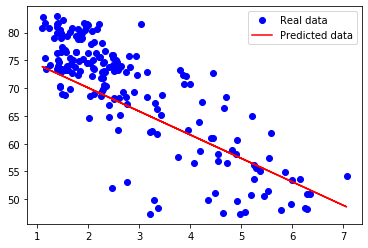

In [26]:
# uncomment the following lines to see the plot 
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data')
plt.legend()
plt.show()

In [24]:
def huber_loss(labels, predictions, delta=14.0):
    residual = tf.abs(labels - predictions)
    def f1(): return 0.5 * tf.square(residual)
    def f2(): return delta * residual - 0.5 * tf.square(delta)
    return tf.cond(residual < delta, f1, f2)

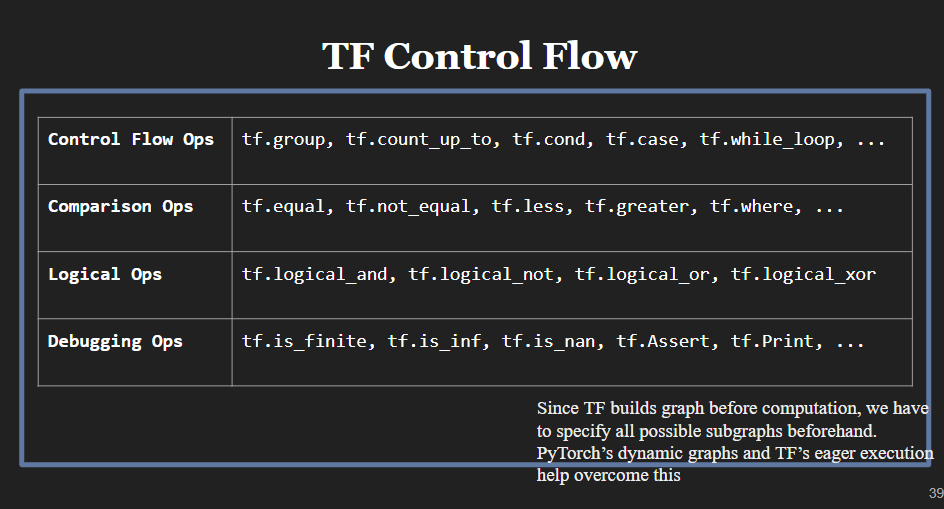